# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [194]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    # vis.show(subplot_kwargs=dict(figsize=(5,5)))
    vis.show()

In [195]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.show()

In [196]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_line(((-10, 5), (20, 10)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

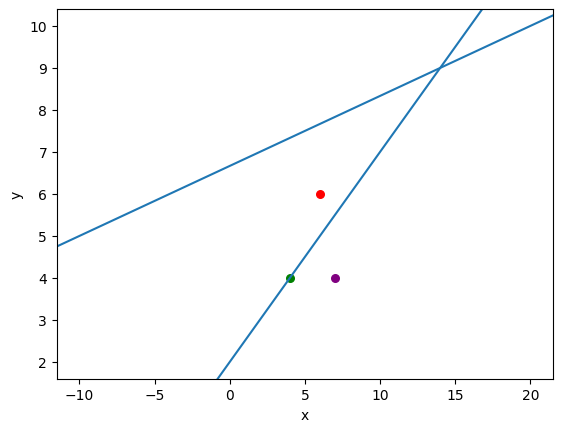

In [197]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [198]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    x = np.float64(np.random.uniform(low=left, high=right, size=n))
    y = np.float64(np.random.uniform(low=left, high=right, size=n))
    return list(zip(x, y))

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [199]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

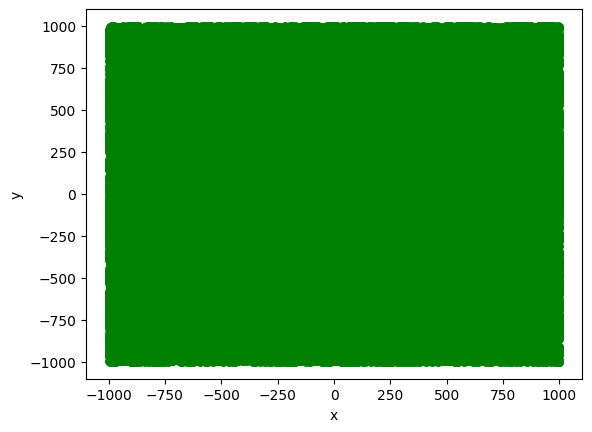

In [200]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [201]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

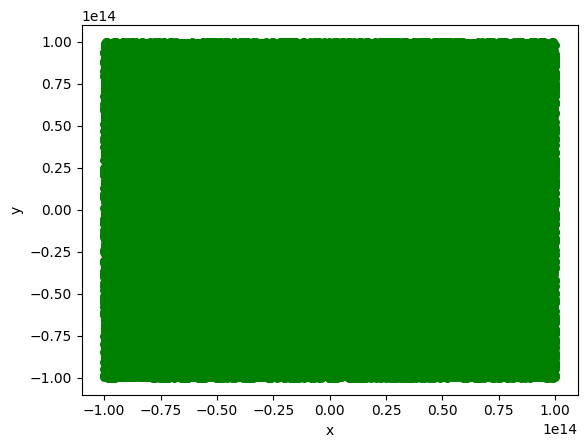

In [202]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [203]:
def generate_circle_points(O, R, n = 100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """

    
    phi = np.float64(np.random.uniform(low=0, high=2*np.pi, size=n))
    x = R * np.cos(phi) + O[0]
    y = R* np.sin(phi) + O[1]
    
    return list(zip(x, y))
    
    

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [204]:
points_c = generate_circle_points((0, 0), 100)

Zwizualizuj wygenerowane punkty.

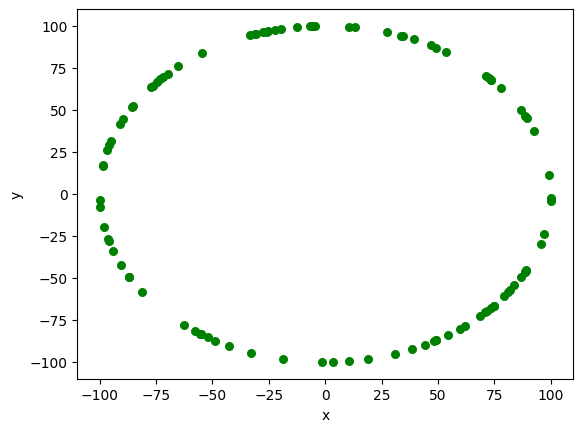

In [205]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [206]:
def generate_collinear_points(a, b, n=1000):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    
    assert a[0] != b[0]
    
    d = (b[1] - a[1]) / (b[0] - a[0])
    c = b[1] - d * b[0]
    t = np.float64(np.random.uniform(low=a[0], high=b[0], size=n))
    x = t
    y = d * t + c
    return list(zip(x, y))

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [207]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

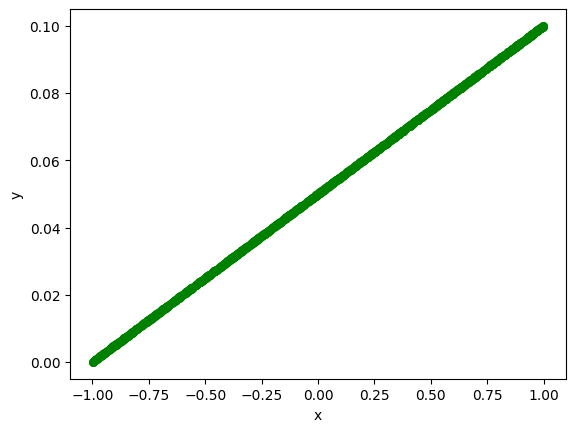

In [208]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [209]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.418s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ac} \times \overrightarrow{bc}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [210]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    
    return a[0] * b[1] + a[1] * c[0] + b[0] * c[1] - c[0] * b[1] - c[1] * a[0] - b[0] * a[1]

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [211]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    A = np.array([[a[0], a[1], 1],
                  [b[0], b[1], 1],
                  [c[0], c[1], 1]])
    return np.linalg.det(A)

Uzupełnij funkcje ```mat_det_2x2```

In [212]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0] - c[0]) * (b[1] - c[1]) - (b[0] - c[0]) * (a[1] - c[1]) 
    

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [213]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    A = np.array([[a[0] - c[0], a[1] - c[1]],
                  [b[0] - c[0], b[1] - c[1]]])
    return np.linalg.det(A)

Przetestujmy napisane powyżej funkcje.

In [214]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.002s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [215]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left = list(filter(lambda c: mat_det_func(a, b, c) < -eps, points))
    right = list(filter(lambda c: mat_det_func(a, b, c) > eps, points))
    line = list(filter(lambda c: -eps < mat_det_func(a, b, c) < eps, points))
    print("Na prawo", len(right))
    print("Na lewo", len(left))
    print("Na prostej", len(line))
    return left, line, right

In [216]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

Wyznacznik 2x2

In [217]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -8)

Na prawo 50014
Na lewo 49986
Na prostej 0


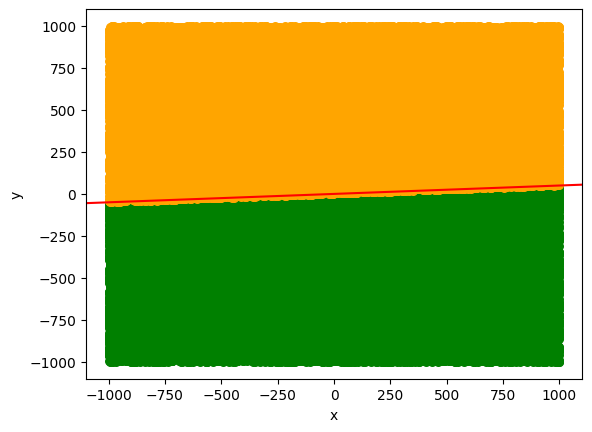

In [218]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [219]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -10 )

Na prawo 50014
Na lewo 49986
Na prostej 0


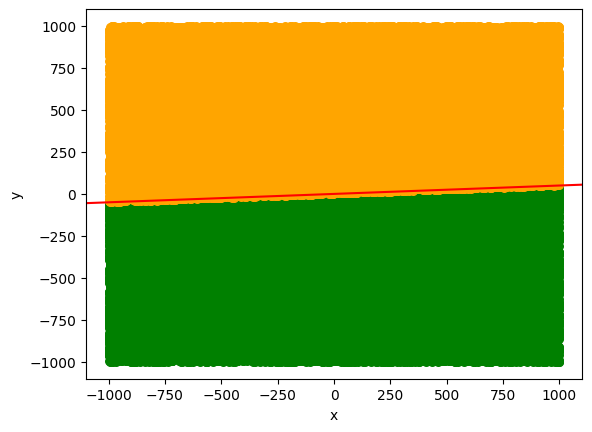

In [220]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [221]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -12)

Na prawo 50014
Na lewo 49986
Na prostej 0


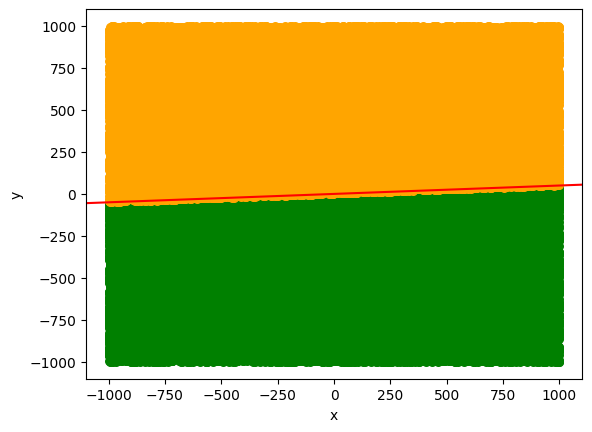

In [222]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [223]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2, 10 ** -14)

Na prawo 50014
Na lewo 49986
Na prostej 0


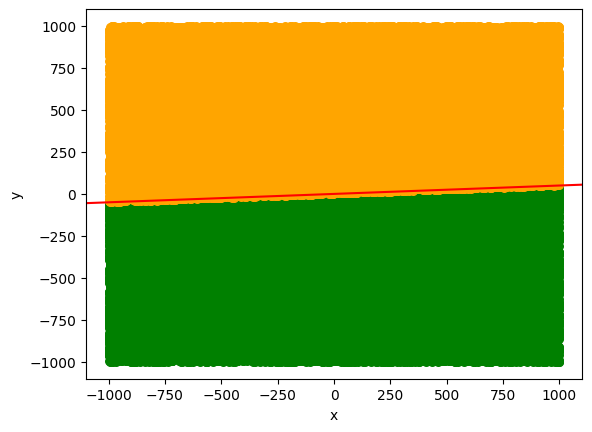

In [224]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

Wyznacznik 2x2_lib 

In [225]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -8)

Na prawo 50014
Na lewo 49986
Na prostej 0


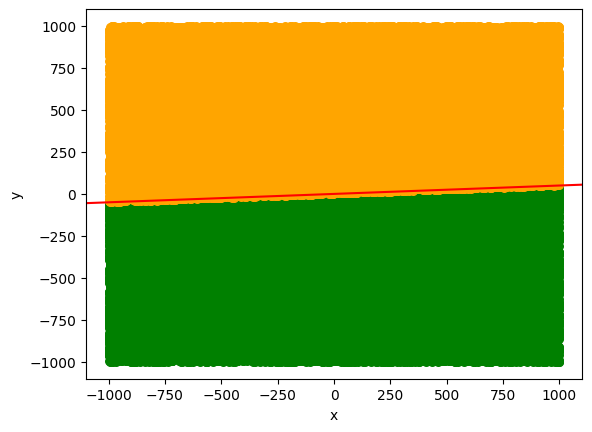

In [226]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [227]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -10)

Na prawo 50014
Na lewo 49986
Na prostej 0


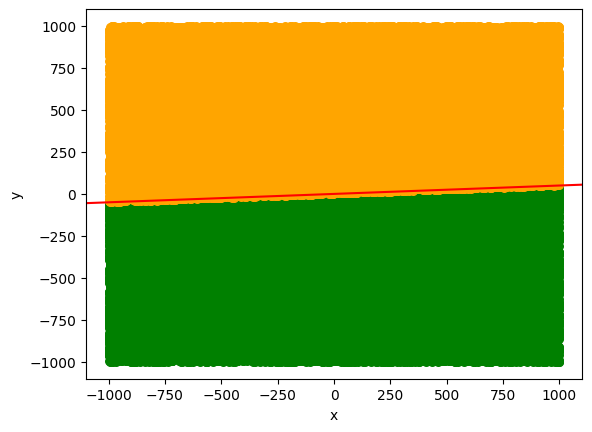

In [228]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [229]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -12)

Na prawo 50014
Na lewo 49986
Na prostej 0


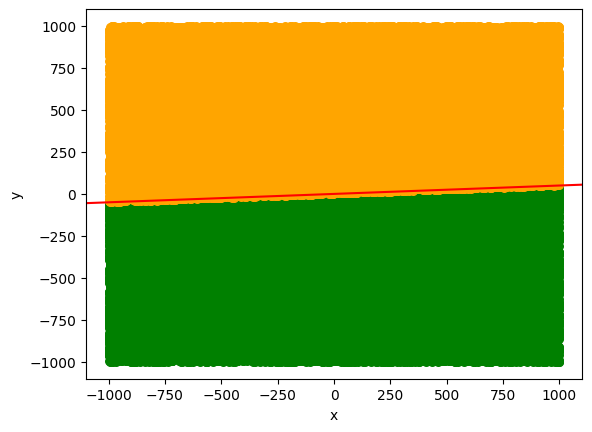

In [231]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [232]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -14)

Na prawo 50014
Na lewo 49986
Na prostej 0


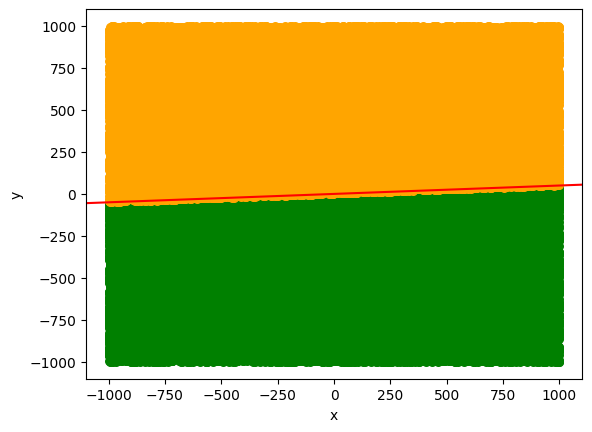

In [233]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [234]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_2x2_lib, 10 ** -18)

Na prawo 50014
Na lewo 49986
Na prostej 0


Wyznacznik 3x3 

In [235]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -8)

Na prawo 50014
Na lewo 49986
Na prostej 0


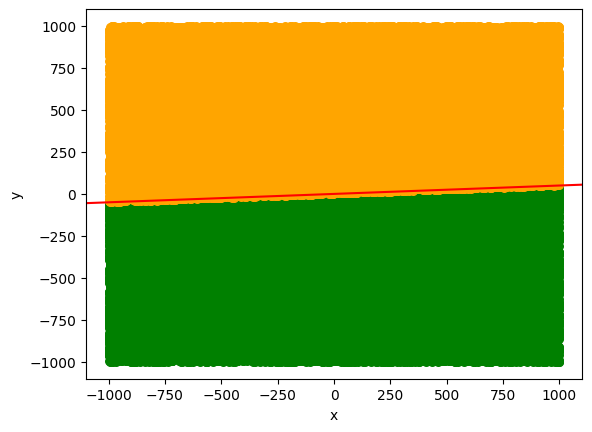

In [236]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [237]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -10)

Na prawo 50014
Na lewo 49986
Na prostej 0


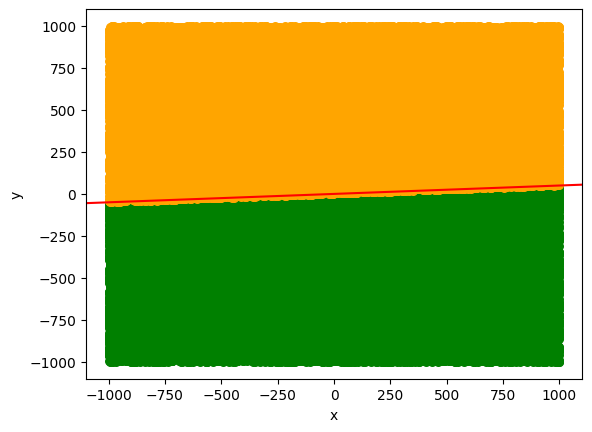

In [238]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [239]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)

Na prawo 50014
Na lewo 49986
Na prostej 0


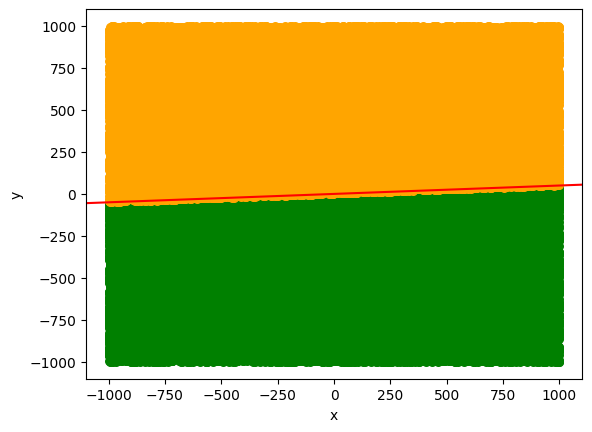

In [240]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [241]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -14)

Na prawo 50014
Na lewo 49986
Na prostej 0


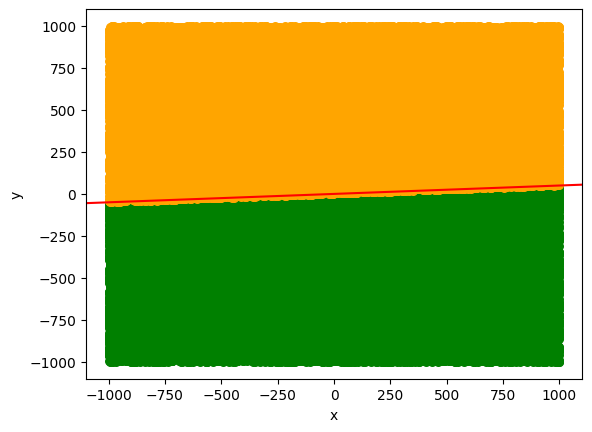

In [242]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

Wyznacznik 3x3 lib

In [243]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -8)

Na prawo 50014
Na lewo 49986
Na prostej 0


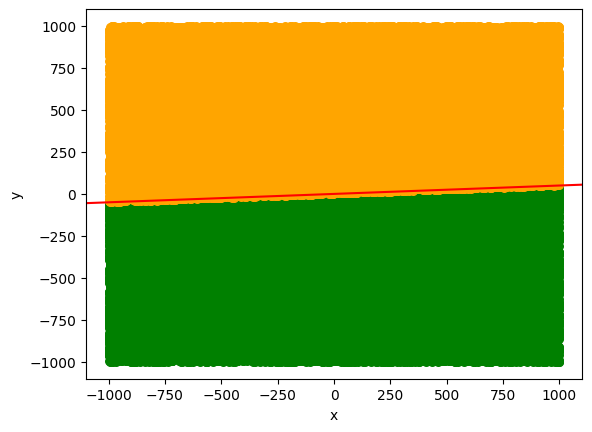

In [244]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [245]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -10)

Na prawo 50014
Na lewo 49986
Na prostej 0


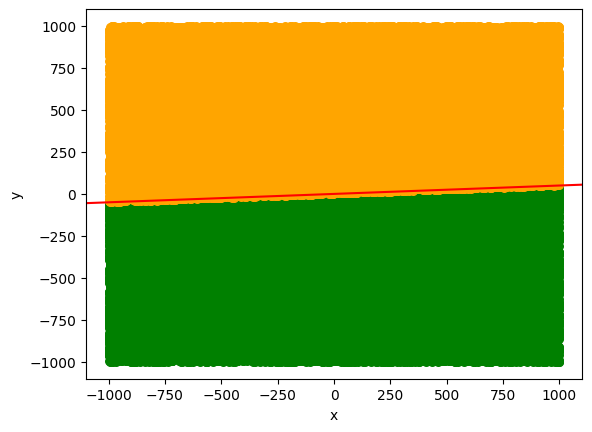

In [246]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [247]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -12)

Na prawo 50014
Na lewo 49986
Na prostej 0


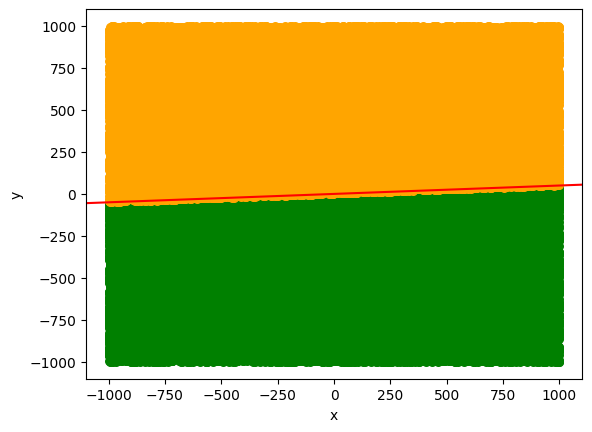

In [248]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [249]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3_lib, 10 ** -14)

Na prawo 50014
Na lewo 49986
Na prostej 0


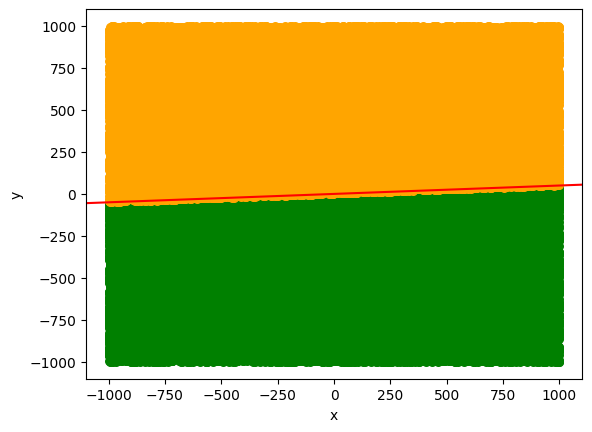

In [250]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

points_b 

Wyznacznik 2x2

In [251]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -8)
print(classified_points_b_mid)

Na prawo 50040
Na lewo 49953
Na prostej 7
[(-98314783732578.61, -4883369258951.969), (99839972825782.16, 4956064498293.781), (85526231898405.6, 4285380932433.1562), (93307645040117.31, 4642636271358.344), (-95377067913980.62, -4751373334892.484), (-91837111327912.95, -4564580841661.891), (-54967367411187.73, -2750039437760.2656)]


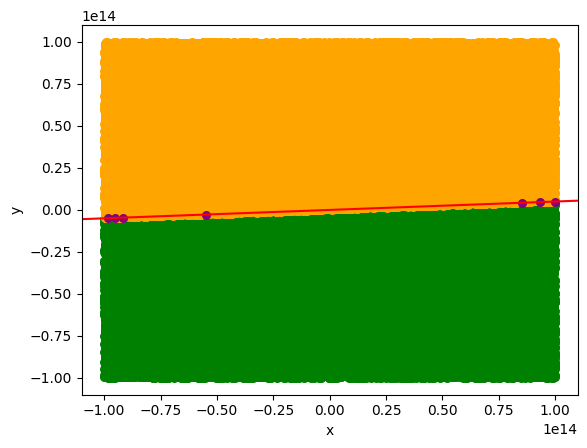

In [252]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [253]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -10)
print(classified_points_b_mid)

Na prawo 50040
Na lewo 49953
Na prostej 7
[(-98314783732578.61, -4883369258951.969), (99839972825782.16, 4956064498293.781), (85526231898405.6, 4285380932433.1562), (93307645040117.31, 4642636271358.344), (-95377067913980.62, -4751373334892.484), (-91837111327912.95, -4564580841661.891), (-54967367411187.73, -2750039437760.2656)]


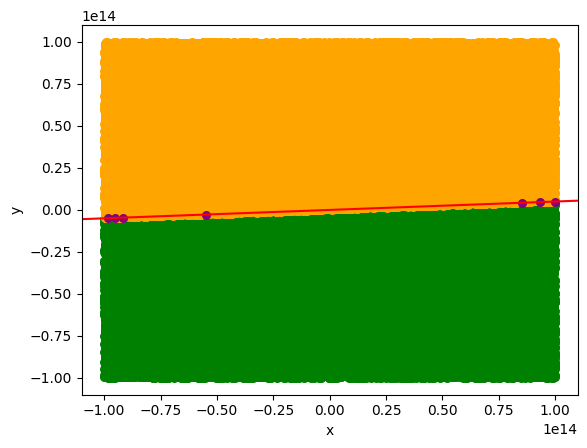

In [254]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [255]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -12)
print(classified_points_b_mid)

Na prawo 50040
Na lewo 49953
Na prostej 7
[(-98314783732578.61, -4883369258951.969), (99839972825782.16, 4956064498293.781), (85526231898405.6, 4285380932433.1562), (93307645040117.31, 4642636271358.344), (-95377067913980.62, -4751373334892.484), (-91837111327912.95, -4564580841661.891), (-54967367411187.73, -2750039437760.2656)]


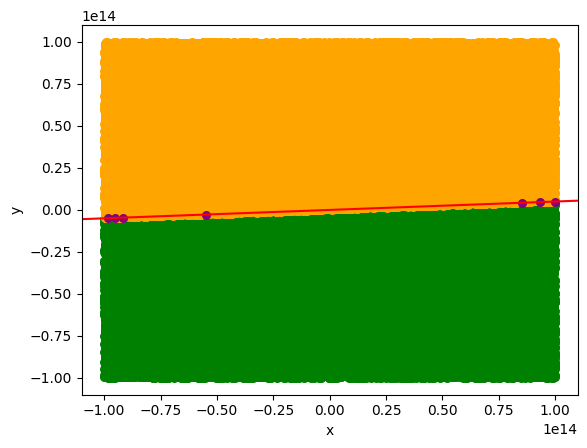

In [256]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [257]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2, 10 ** -14)
print(classified_points_b_mid)

Na prawo 50040
Na lewo 49953
Na prostej 7
[(-98314783732578.61, -4883369258951.969), (99839972825782.16, 4956064498293.781), (85526231898405.6, 4285380932433.1562), (93307645040117.31, 4642636271358.344), (-95377067913980.62, -4751373334892.484), (-91837111327912.95, -4564580841661.891), (-54967367411187.73, -2750039437760.2656)]


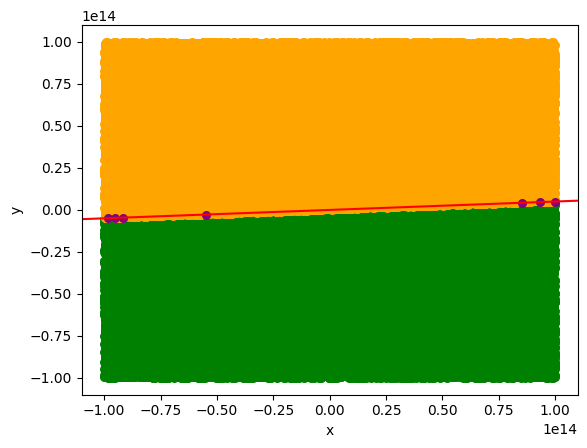

In [258]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

Wyznacznik 2x2 lib

In [259]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -8)
print(classified_points_b_mid)

Na prawo 50041
Na lewo 49953
Na prostej 6
[(-98314783732578.61, -4883369258951.969), (85803380410707.6, 4290389430148.3594), (93307645040117.31, 4642636271358.344), (-95377067913980.62, -4751373334892.484), (-91986048130393.5, -4561038170696.266), (-91837111327912.95, -4564580841661.891)]


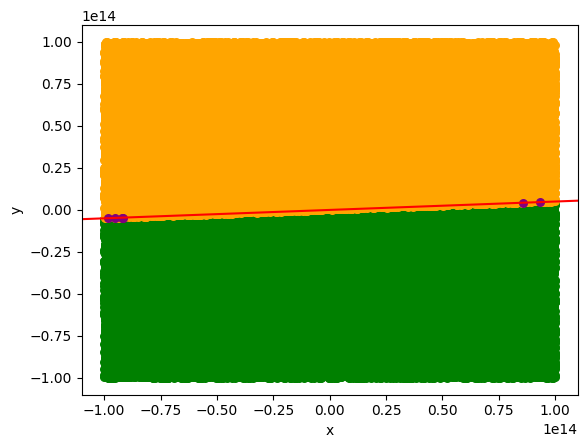

In [260]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [261]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -10)

Na prawo 50041
Na lewo 49953
Na prostej 6


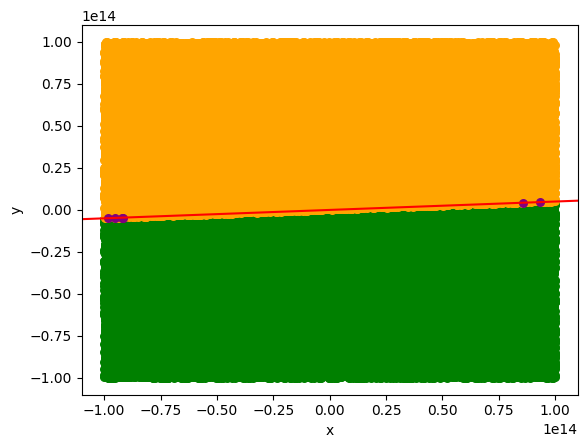

In [262]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [263]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -12)

Na prawo 50041
Na lewo 49953
Na prostej 6


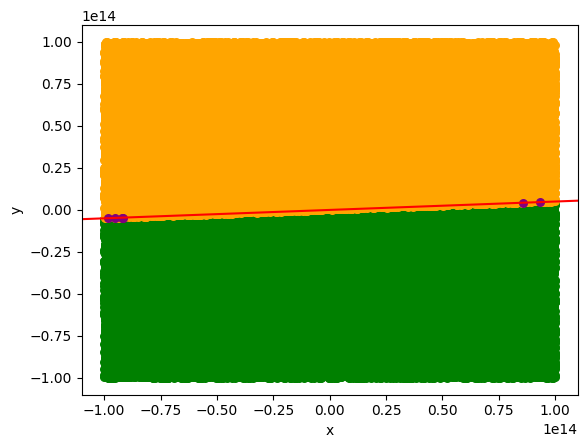

In [264]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [265]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_2x2_lib, 10 ** -14)

Na prawo 50041
Na lewo 49953
Na prostej 6


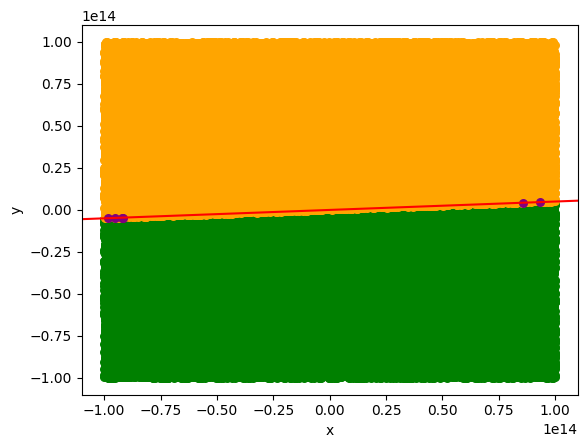

In [266]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

Wyznaczik 3x3

In [267]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -8)

Na prawo 50044
Na lewo 49956
Na prostej 0


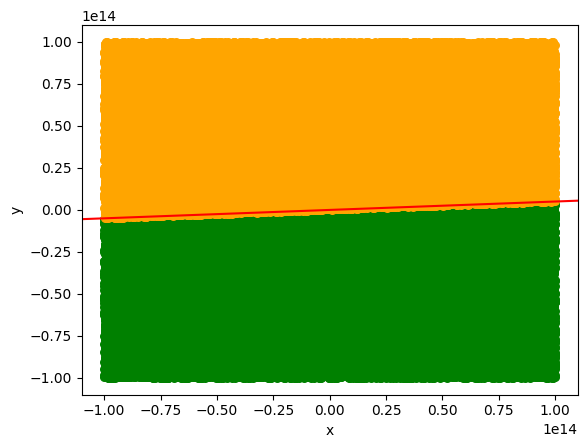

In [268]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [269]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -10)

Na prawo 50044
Na lewo 49956
Na prostej 0


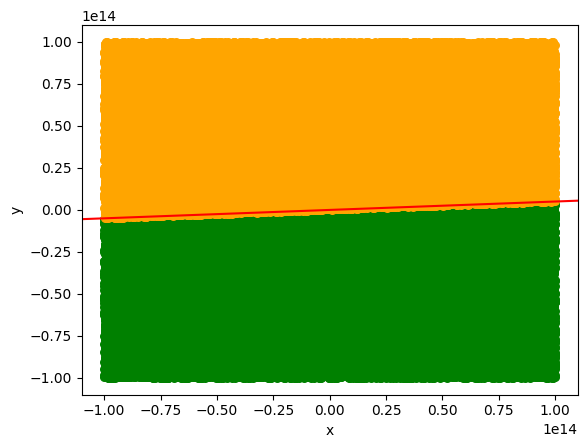

In [270]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [271]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -12)

Na prawo 50044
Na lewo 49956
Na prostej 0


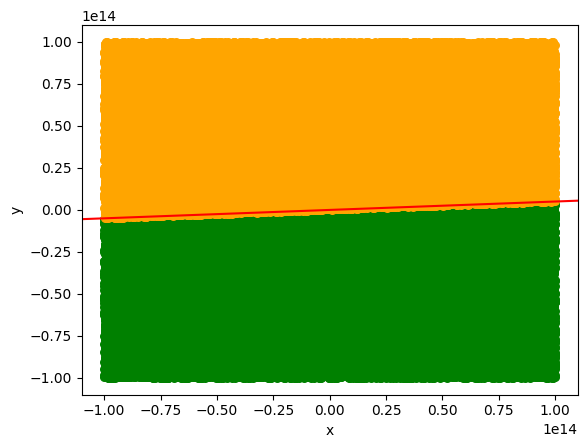

In [272]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [273]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3, 10 ** -14)

Na prawo 50044
Na lewo 49956
Na prostej 0


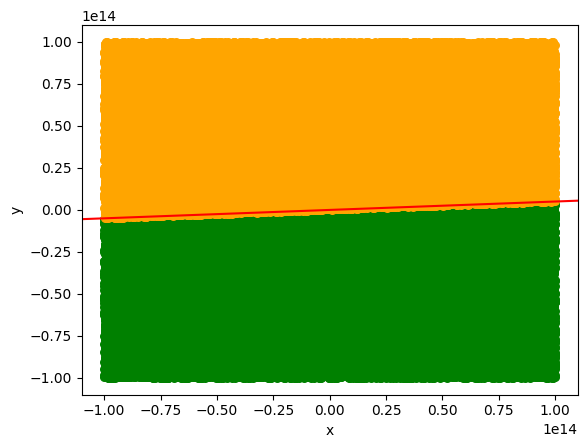

In [274]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

Wyznacznik 3x3 lib

In [275]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -8)

Na prawo 50044
Na lewo 49956
Na prostej 0


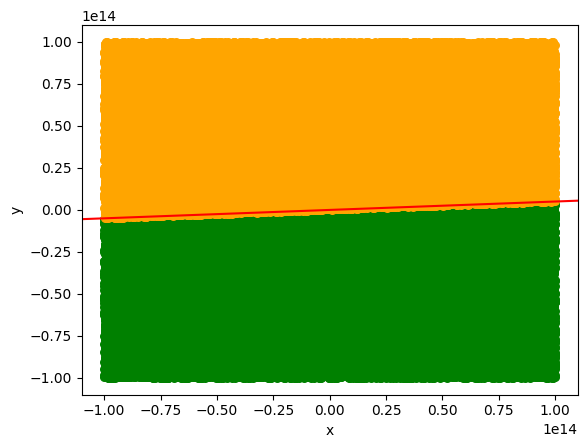

In [276]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [277]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -10)

Na prawo 50044
Na lewo 49956
Na prostej 0


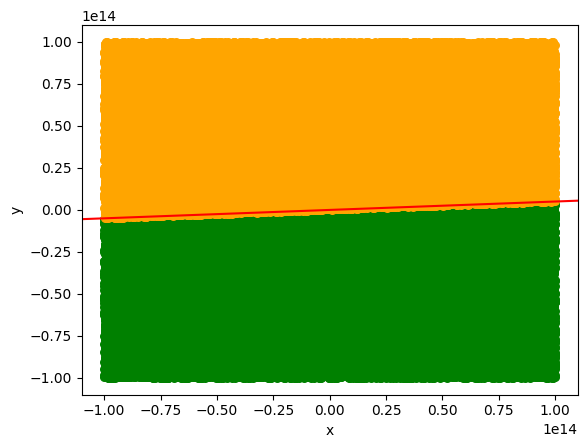

In [278]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [279]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

Na prawo 50044
Na lewo 49956
Na prostej 0


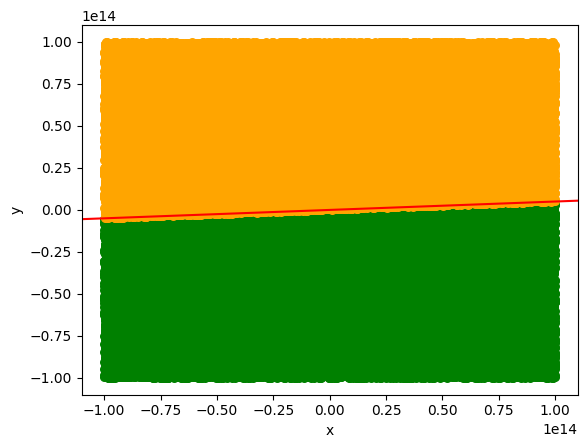

In [280]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [281]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -14)

Na prawo 50044
Na lewo 49956
Na prostej 0


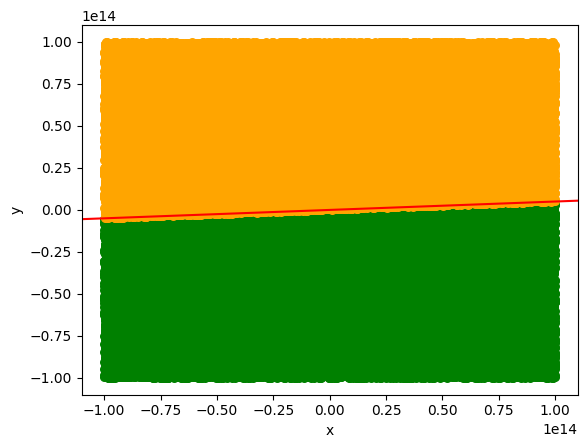

In [282]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

points_c

Wyznacznik 2x2

In [283]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -8)

Na prawo 49
Na lewo 51
Na prostej 0


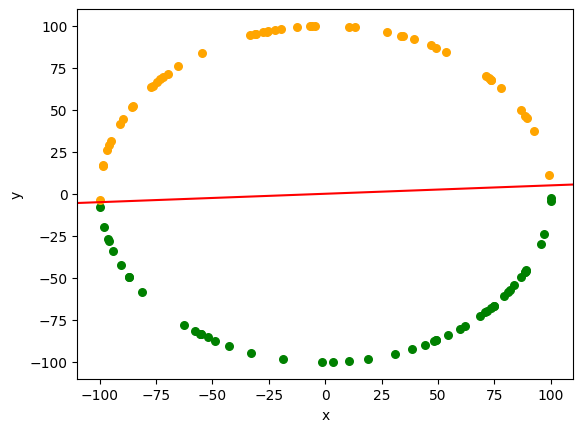

In [284]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [285]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -10)

Na prawo 49
Na lewo 51
Na prostej 0


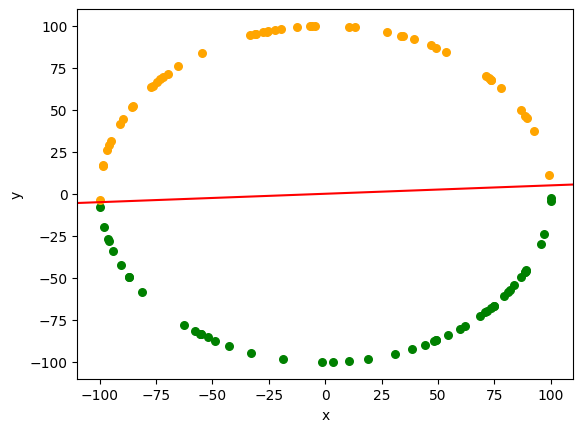

In [286]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [287]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

Na prawo 49
Na lewo 51
Na prostej 0


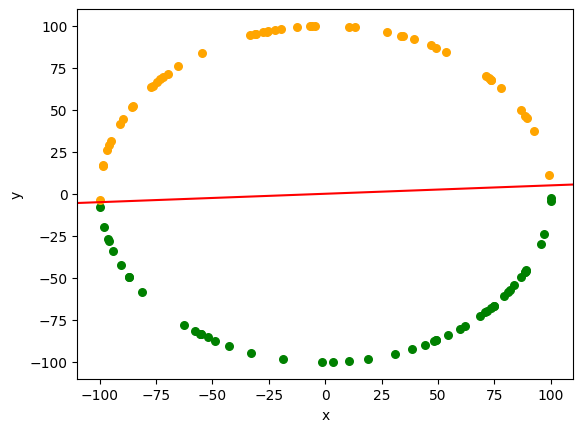

In [288]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [289]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -14)

Na prawo 49
Na lewo 51
Na prostej 0


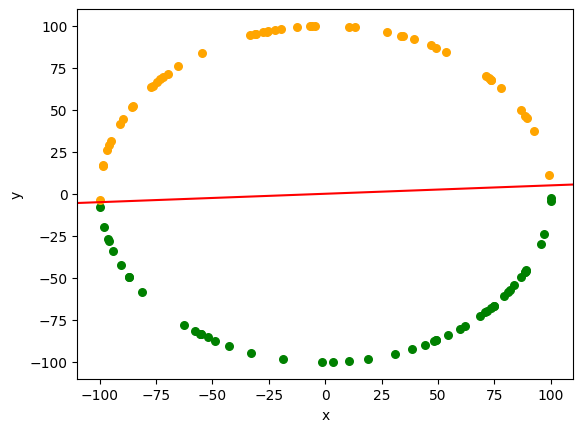

In [290]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

Wyznacznik 2x2 lib 

In [291]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -8)

Na prawo 49
Na lewo 51
Na prostej 0


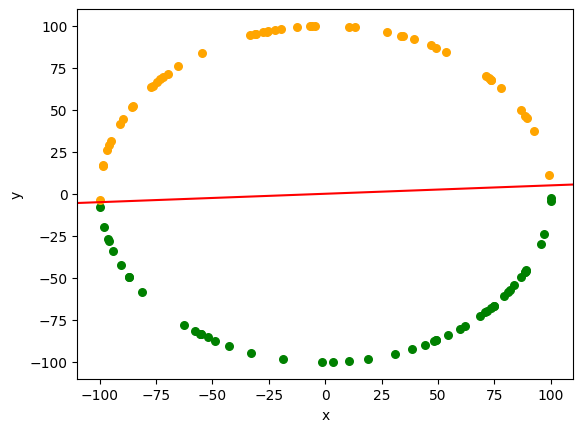

In [292]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [293]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -10)

Na prawo 49
Na lewo 51
Na prostej 0


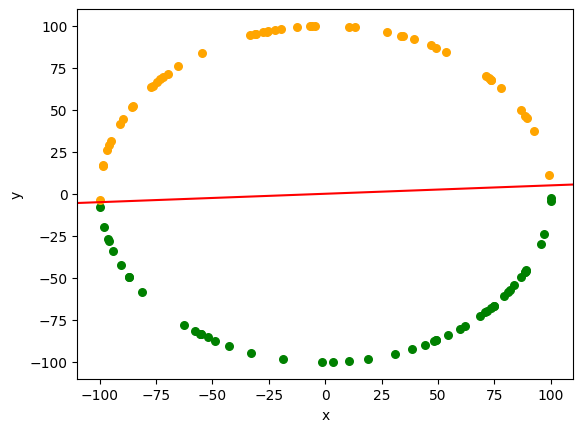

In [294]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [295]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -12)

Na prawo 49
Na lewo 51
Na prostej 0


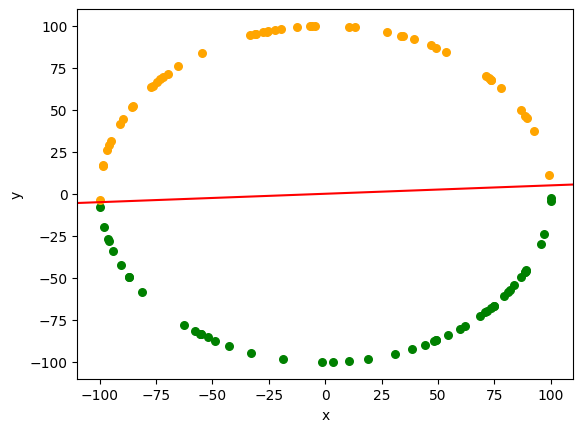

In [296]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [297]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2_lib, 10 ** -14)

Na prawo 49
Na lewo 51
Na prostej 0


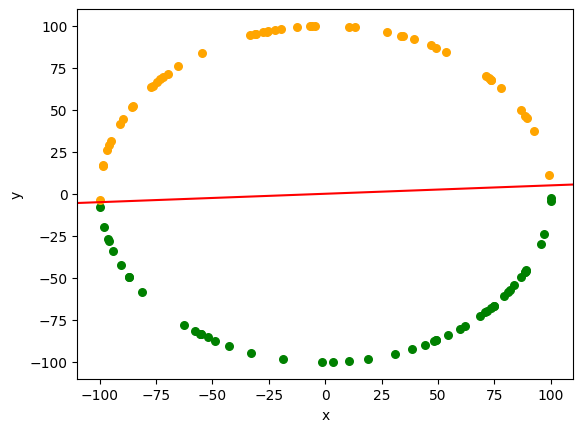

In [298]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

Wyznaczmik 3x3 

In [299]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -8)

Na prawo 49
Na lewo 51
Na prostej 0


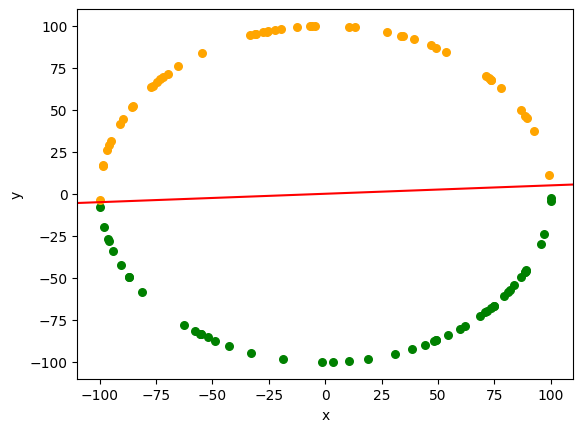

In [300]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [301]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -10)

Na prawo 49
Na lewo 51
Na prostej 0


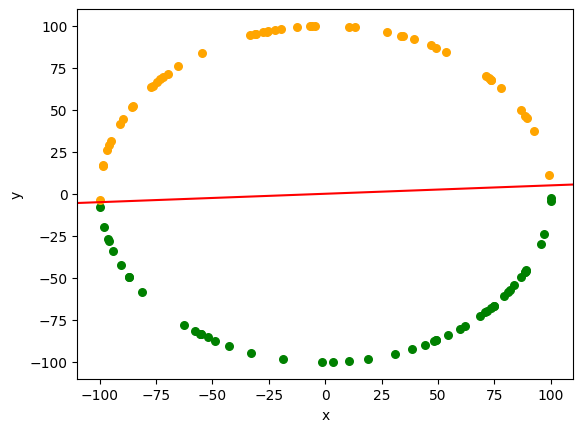

In [302]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [303]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -12)

Na prawo 49
Na lewo 51
Na prostej 0


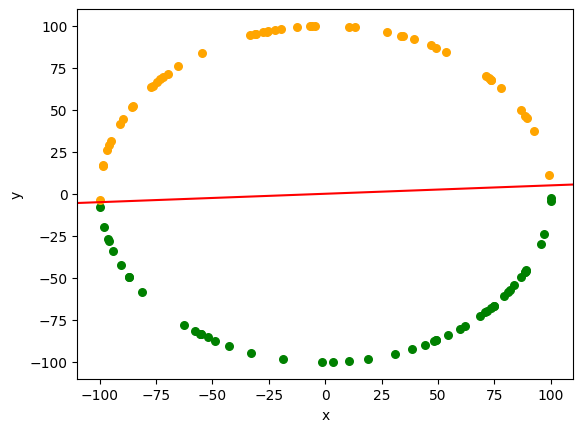

In [304]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [305]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3, 10 ** -14)

Na prawo 49
Na lewo 51
Na prostej 0


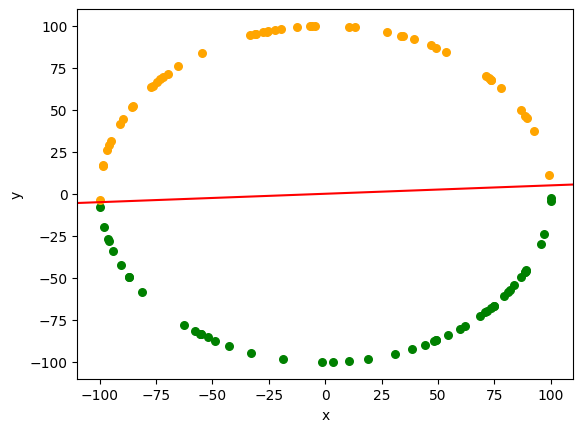

In [306]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

Wyznacznik 3x3 lib

In [307]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -8)

Na prawo 49
Na lewo 51
Na prostej 0


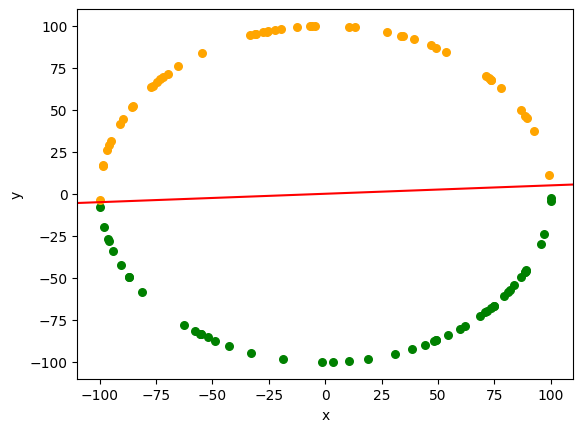

In [308]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [309]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -10)

Na prawo 49
Na lewo 51
Na prostej 0


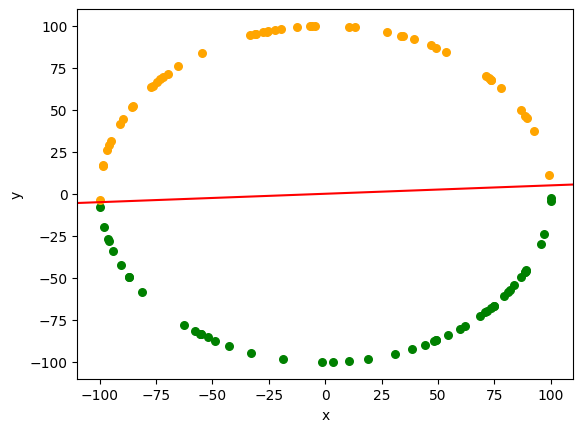

In [310]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [311]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -12)

Na prawo 49
Na lewo 51
Na prostej 0


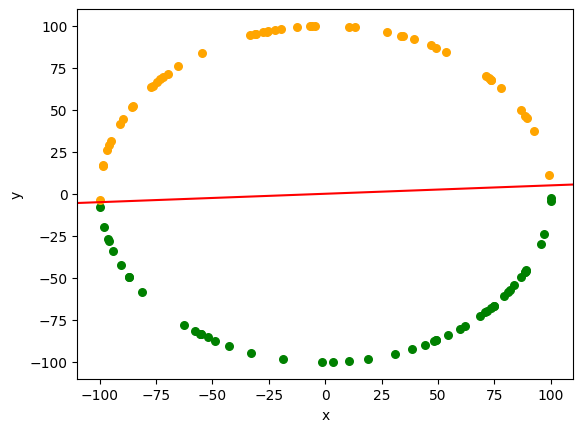

In [312]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [313]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_3x3_lib, 10 ** -14)

Na prawo 49
Na lewo 51
Na prostej 0


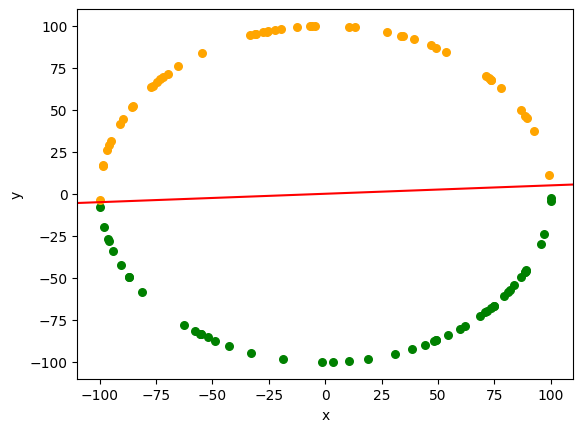

In [314]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

points_d

Wyznacznik 2x2

In [315]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -16)

Na prawo 0
Na lewo 0
Na prostej 1000


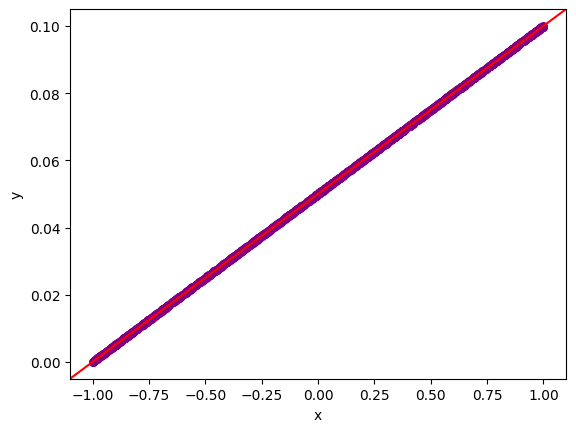

In [316]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [317]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -18)

Na prawo 357
Na lewo 349
Na prostej 294


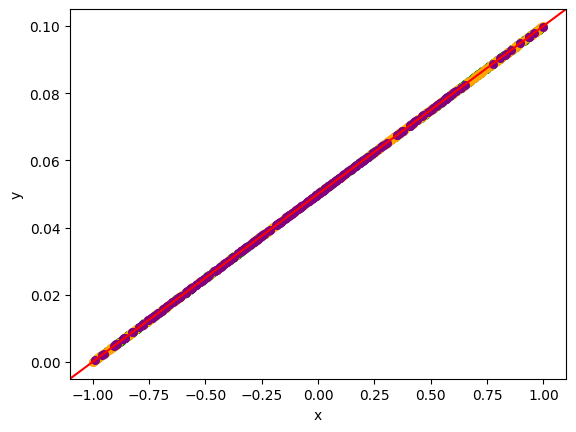

In [318]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [319]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -20)

Na prawo 360
Na lewo 349
Na prostej 291


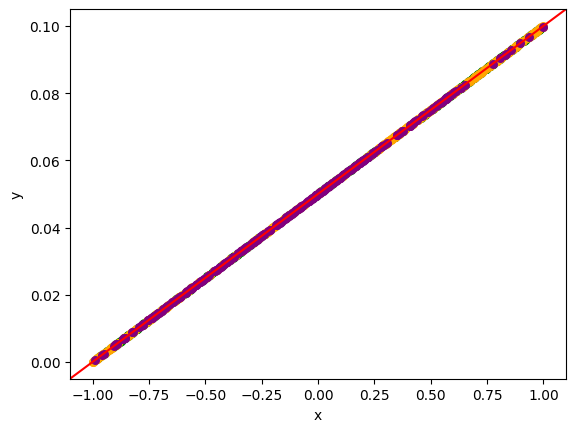

In [320]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [321]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2, 10 ** -22)

Na prawo 360
Na lewo 349
Na prostej 291


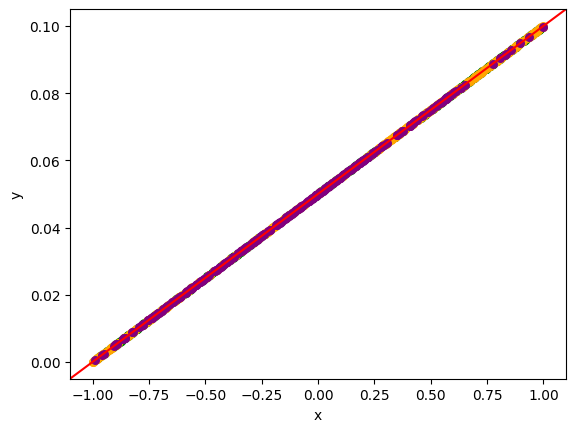

In [322]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Wyznacznik 2x2 lib

In [323]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -16)

Na prawo 0
Na lewo 0
Na prostej 1000


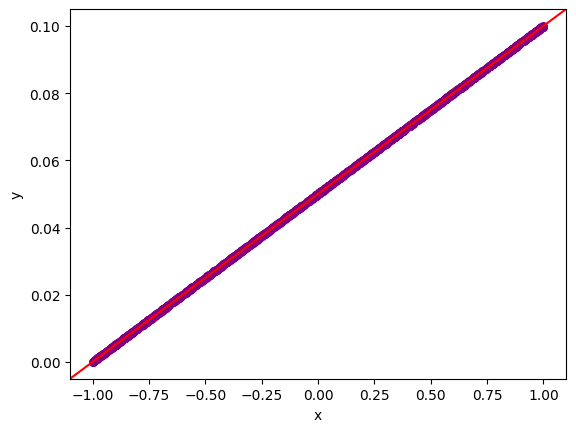

In [324]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [325]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -18)

Na prawo 360
Na lewo 343
Na prostej 297


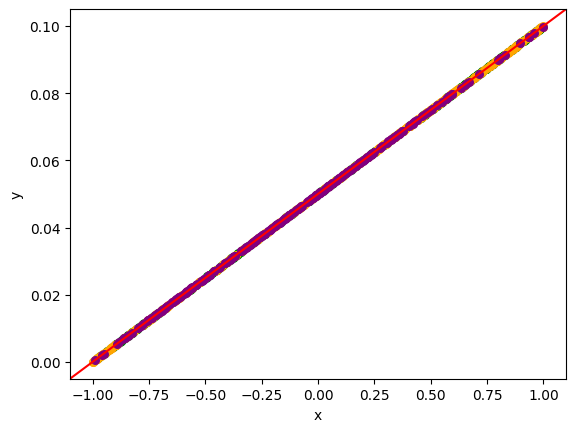

In [326]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [327]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -20)

Na prawo 361
Na lewo 345
Na prostej 294


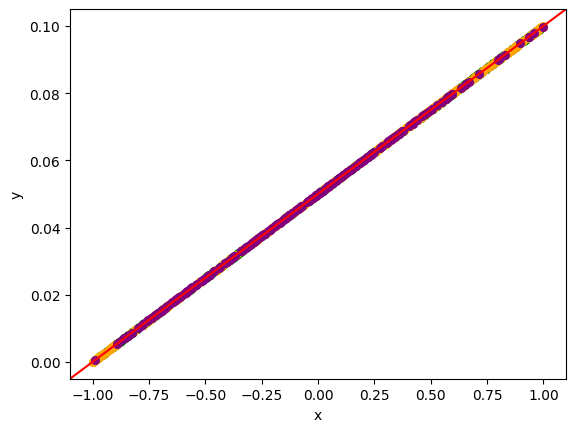

In [328]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [329]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -22)

Na prawo 361
Na lewo 345
Na prostej 294


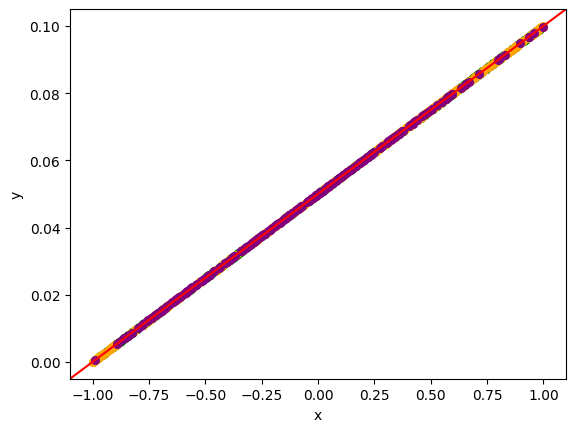

In [330]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Wyznacznik 3x3

In [331]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -16)

Na prawo 0
Na lewo 0
Na prostej 1000


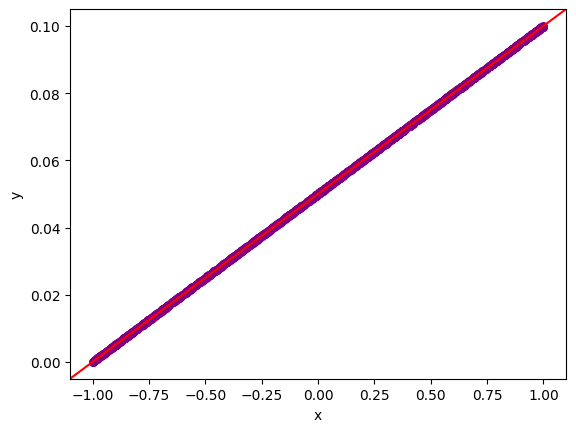

In [332]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [333]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -18)

Na prawo 293
Na lewo 234
Na prostej 473


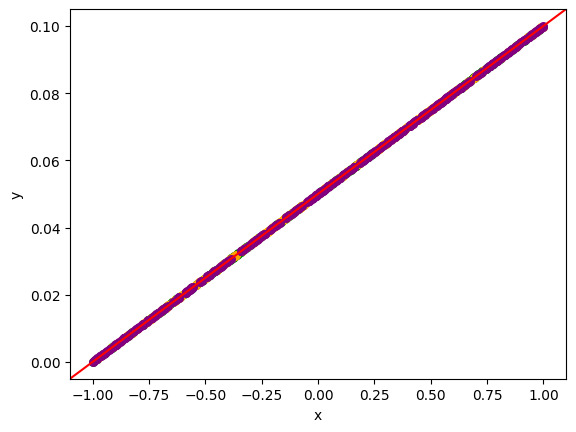

In [334]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [335]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -20)

Na prawo 293
Na lewo 234
Na prostej 473


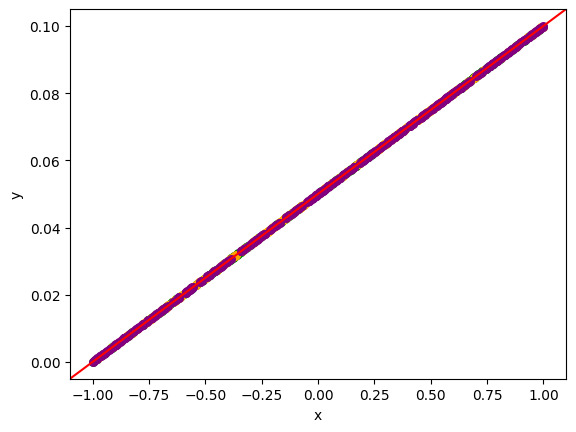

In [336]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [337]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3, 10 ** -22)

Na prawo 293
Na lewo 234
Na prostej 473


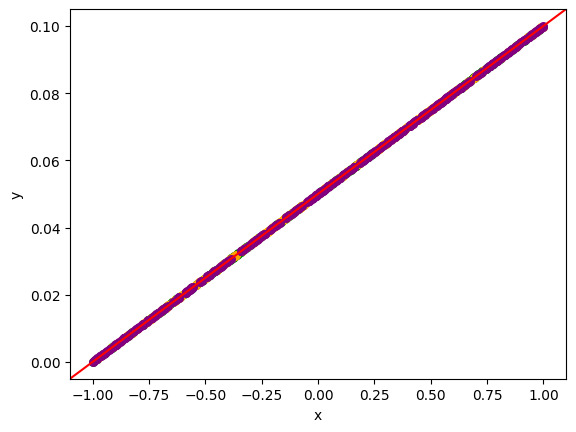

In [338]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Wyznacznik 3x3 lib

In [339]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -16)

Na prawo 0
Na lewo 0
Na prostej 1000


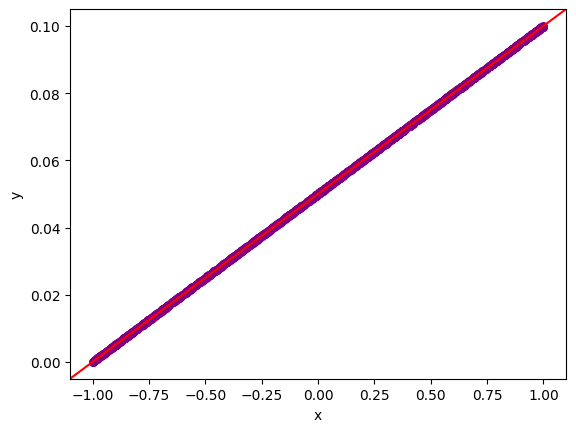

In [340]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [341]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -18)

Na prawo 196
Na lewo 10
Na prostej 794


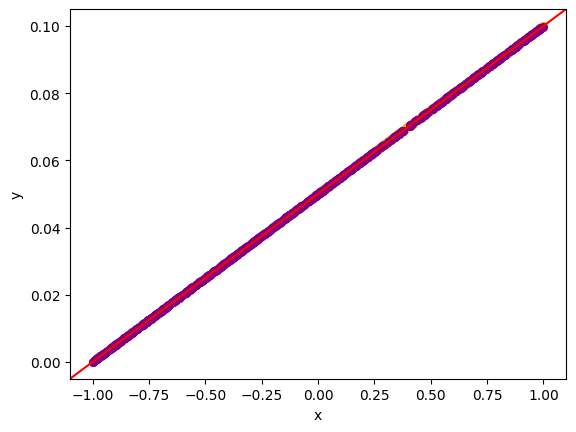

In [342]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [343]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -20)

Na prawo 196
Na lewo 10
Na prostej 794


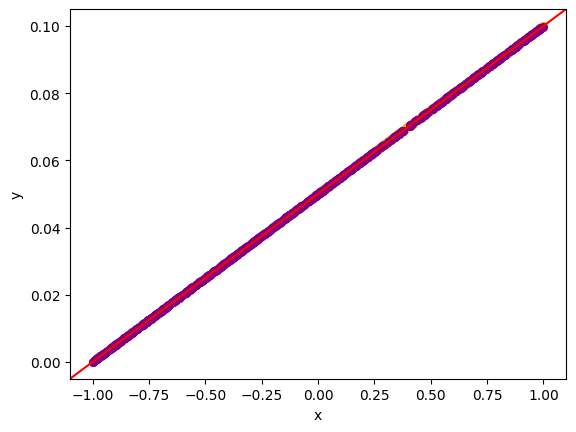

In [344]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [345]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -22)

Na prawo 196
Na lewo 10
Na prostej 794


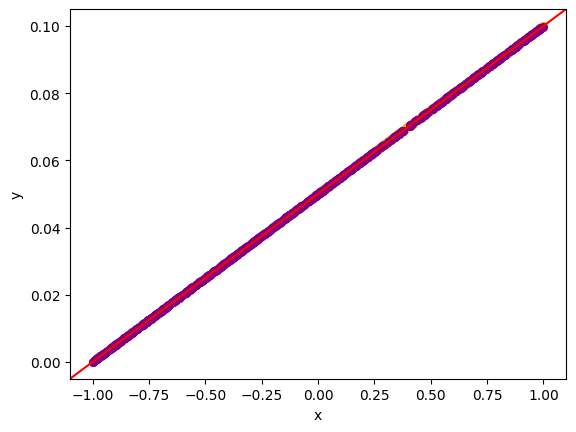

In [346]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [347]:
points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

### Inny float

In [348]:
points_d_float32 = np.float32(points_d)

In [349]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_2x2, 10**-16)

Na prawo 415
Na lewo 426
Na prostej 159


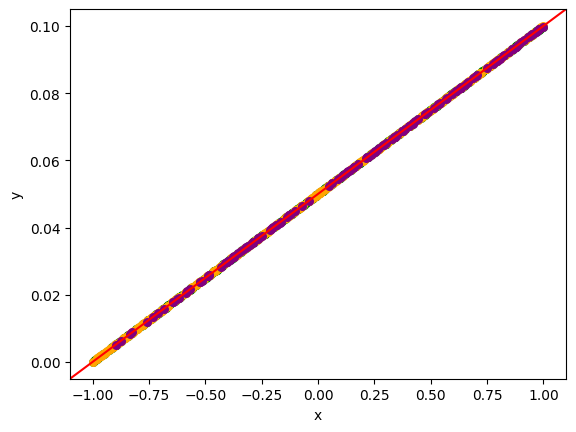

In [350]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [351]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_2x2_lib, 10**-18)

Na prawo 416
Na lewo 537
Na prostej 47


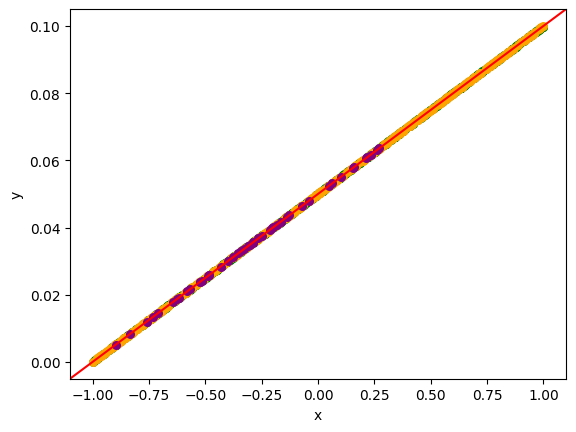

In [352]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [353]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_3x3, 10**-20)

Na prawo 415
Na lewo 502
Na prostej 83


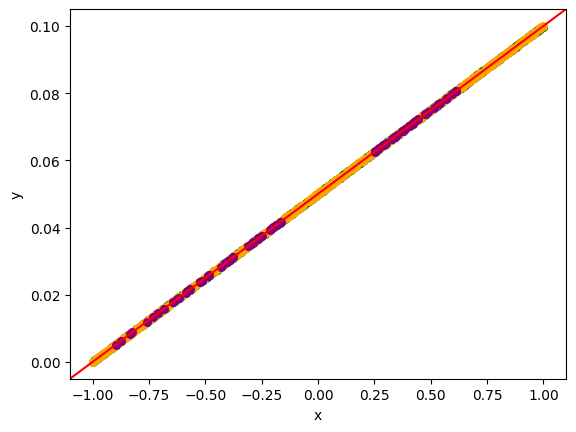

In [354]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

In [355]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d_float32, a, b, mat_det_3x3_lib, 10**-22)

Na prawo 415
Na lewo 426
Na prostej 159


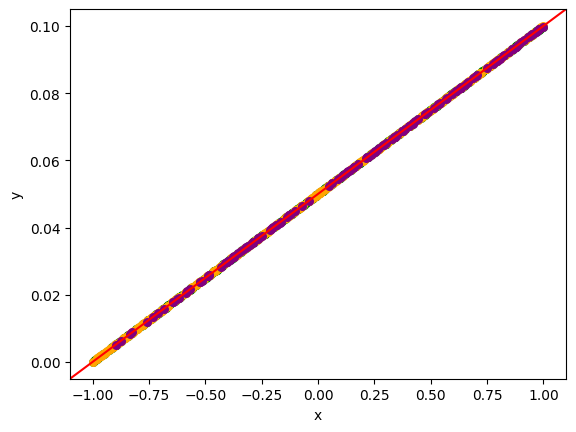

In [356]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


In [357]:
from time import time
start = time()
categorize_points(points_d, a, b, mat_det_2x2, 10 ** -18)
stop = time()
print(stop - start)


Na prawo 357
Na lewo 349
Na prostej 294
0.012089014053344727


In [358]:
start = time()
categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -18)
stop = time()
print(stop - start)

Na prawo 360
Na lewo 343
Na prostej 297
0.10485720634460449


In [359]:
start = time()
categorize_points(points_d, a, b, mat_det_3x3, 10 ** -18)
stop = time()
print(stop - start)

Na prawo 293
Na lewo 234
Na prostej 473
0.013154745101928711


In [360]:
start = time()
categorize_points(points_d, a, b, mat_det_3x3_lib, 10 ** -18)
stop = time()
print(stop - start)

Na prawo 196
Na lewo 10
Na prostej 794
0.17999005317687988
